# Imports

In [1]:
import os
import pandas as pd

In [2]:
csv_path = '../content/sample_data' # google colab path
#csv_path = '../raw_data' # our pc path
cleandf = pd.read_csv(os.path.join(csv_path, 'clean_data.csv'))

In [3]:
cleandf

,Unnamed: 0,text,target
0,0,smell hillary fear daniel greenfield shillman ...,0
1,1,watch exact moment paul ryan commit political ...,0
2,2,kerry go paris gesture sympathy u secretary st...,1
3,3,bernie supporter twitter erupt anger dnc try w...,0
4,4,battle new york primary matter primary day new...,1
...,...,...,...
6330,6330,state department say can find email clinton sp...,1
6331,6331,p pb stand plutocratic pentagon p pb stand plu...,0
6332,6332,anti trump protester tool oligarchy informatio...,0
6333,6333,ethiopia obama seek progress peace security ea...,1


In [4]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.layers import Dense, Conv1D, Embedding, Flatten, Masking, Dropout, LSTM, GRU
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Variables

In [5]:
es = EarlyStopping(monitor='val_binary_accuracy', patience=10, restore_best_weights=True)

In [13]:
tokenizer = Tokenizer()

In [6]:
binacc = BinaryAccuracy()
prec = Precision()
rec = Recall()

In [7]:
qty_neurons = [20, 30, 40, 50, 60]

# Functions

In [8]:
def plot_loss_accuracy(history, title):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(15,10))
    
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title(f'{title} Loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=2)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['binary_accuracy'])
    ax2.plot(history.history['val_binary_accuracy'])
    ax2.set_title(f'{title} Accuracy')
    ax2.set_ylabel('Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=2)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    ax3.plot(history.history['precision'])
    ax3.plot(history.history['val_precision'])
    ax3.set_title(f'{title} Precision')
    ax3.set_ylabel('Precision')
    ax3.set_xlabel('Epoch')
    ax3.set_ylim(ymin=0, ymax=2)
    ax3.legend(['Train', 'Validation'], loc='best')
    ax3.grid(axis="x",linewidth=0.5)
    ax3.grid(axis="y",linewidth=0.5)    
    
    ax4.plot(history.history['recall'])
    ax4.plot(history.history['val_recall'])
    ax4.set_title(f'{title} Recall')
    ax4.set_ylabel('Recall')
    ax4.set_xlabel('Epoch')
    ax4.set_ylim(ymin=0, ymax=2)
    ax4.legend(['Train', 'Validation'], loc='best')
    ax4.grid(axis="x",linewidth=0.5)
    ax4.grid(axis="y",linewidth=0.5)  
    
    plt.show()

In [26]:
def initialize_model (model_name, neurons):
    model = Sequential()
    model.add(Embedding(
        input_dim=(len(tokenizer.word_index))+1, # +1 for the 0 padding
        input_length=300, # Max_sentence_length (optional, for model summary)
        output_dim=100,
        mask_zero=True, # Built-in masking layer :)
    ))
    if model_name == 'lstm':
        model.add(LSTM((neurons*2), return_sequences=False))
        model.add(Dense((neurons), activation='relu'))
    if model_name == 'gru':
        model.add(GRU((neurons*2), return_sequences=False))
        model.add(Dense((neurons), activation='relu'))
    if model_name == 'cnn':
        model.add(Conv1D(neurons, kernel_size=5, activation='tanh'))
        model.add(Flatten())
        model.add(Dense((neurons/2), activation='relu'))
    #model.add(Dropout(rate=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [20]:
def compile_model(model):
    model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.0001), 
              metrics=[binacc, prec, rec]) 
    return model

# Testing models

## CNN model

### Preparing data

In [32]:
    X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=0.25)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_token = tokenizer.texts_to_sequences(X_train)
    X_test_token = tokenizer.texts_to_sequences(X_test)
    X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
    X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)

### Testing model

50/50 [==============================] - 0s 4ms/step - loss: 0.2801 - binary_accuracy: 0.9141 - precision: 0.9288 - recall: 0.8957


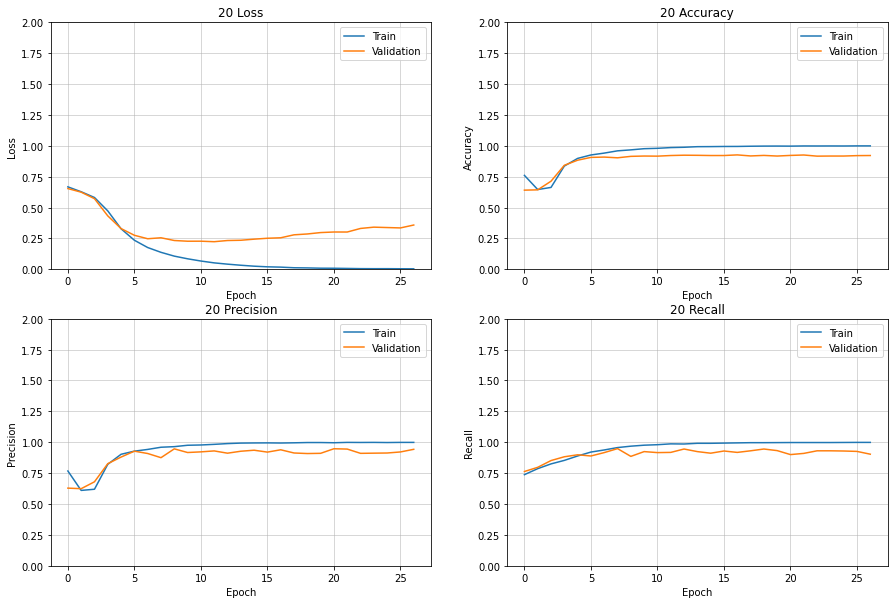

50/50 [==============================] - 0s 3ms/step - loss: 0.2770 - binary_accuracy: 0.9091 - precision: 0.9326 - recall: 0.8804


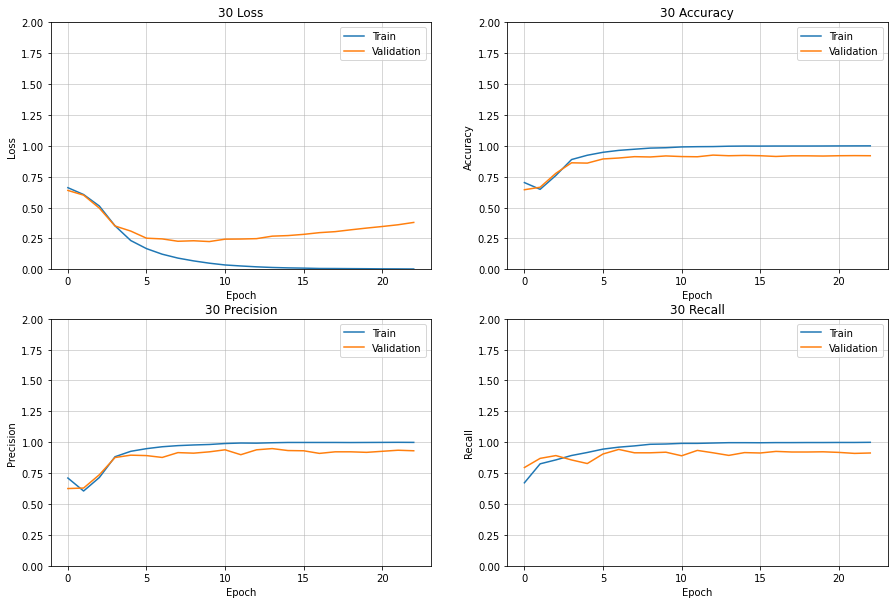

50/50 [==============================] - 0s 4ms/step - loss: 0.2945 - binary_accuracy: 0.9078 - precision: 0.9156 - recall: 0.8969


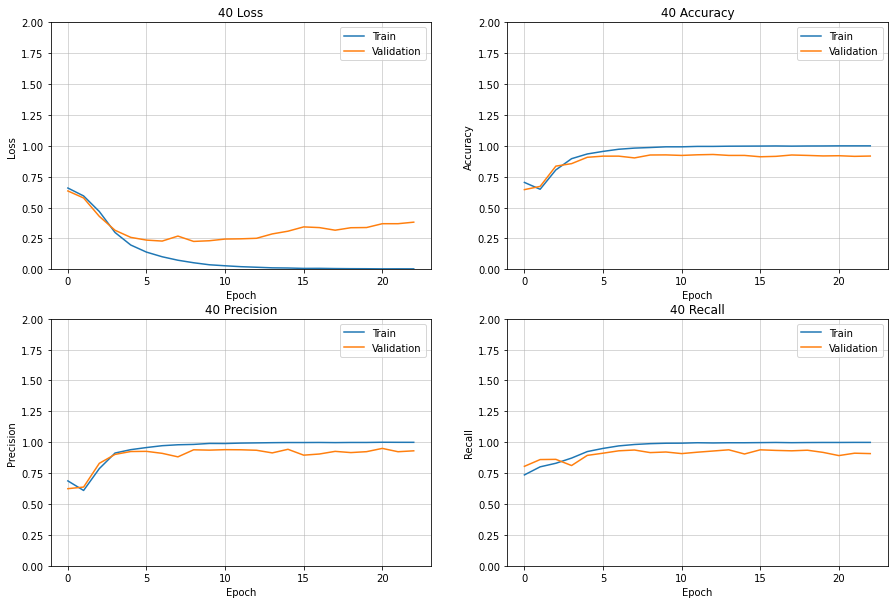

50/50 [==============================] - 0s 4ms/step - loss: 0.2992 - binary_accuracy: 0.9116 - precision: 0.9295 - recall: 0.8893


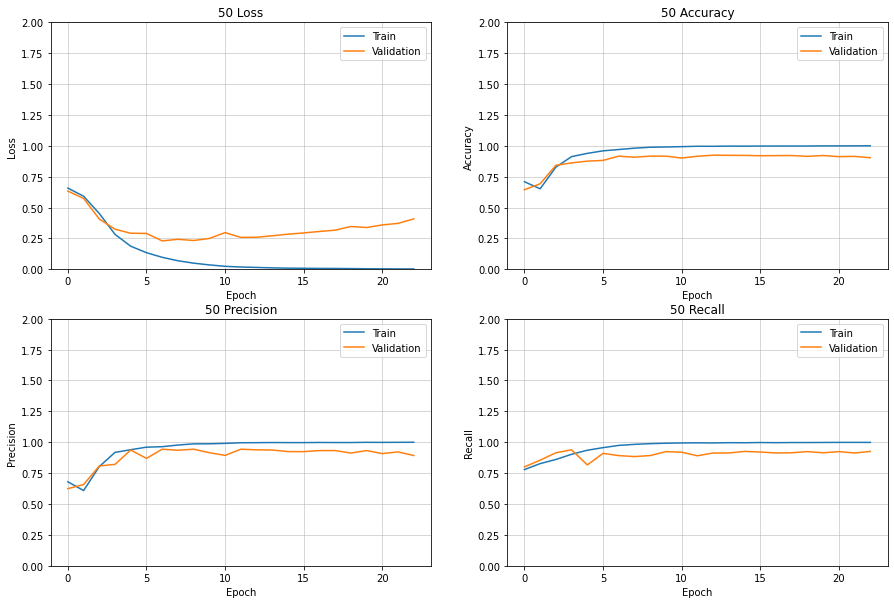

50/50 [==============================] - 0s 4ms/step - loss: 0.3008 - binary_accuracy: 0.9034 - precision: 0.9214 - recall: 0.8804


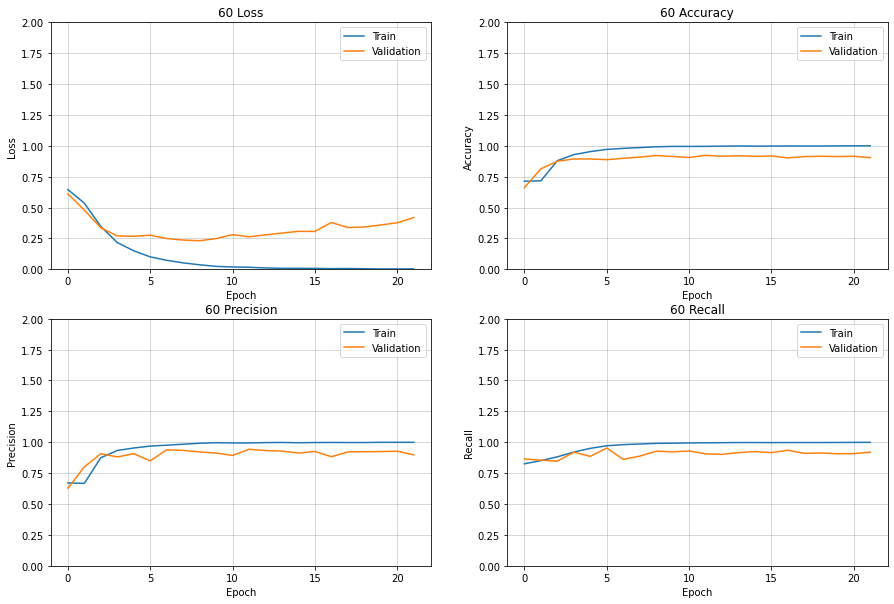

CPU times: user 1min 57s, sys: 11.6 s, total: 2min 8s
Wall time: 1min 38s


In [34]:
%%time
for neurons in qty_neurons:
    model = compile_model(initialize_model('cnn', neurons))
    #model.summary()
    history = model.fit(X_train_token, y_train, 
          epochs=50, 
          batch_size=32,
          validation_split=0.25,
          callbacks=[es],
        verbose = 0, 
        use_multiprocessing=True
          )
    model.evaluate(X_test_token, y_test, verbose=1)
    plot_loss_accuracy(history, f'{neurons} neurons')

## Result:
### Best number of neurons: 20
### Sidenote: fastest model

## LSTM model

### Preparing data

In [41]:
    X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=0.2)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_token = tokenizer.texts_to_sequences(X_train)
    X_test_token = tokenizer.texts_to_sequences(X_test)
    X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
    X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)

### Testing model

40/40 [==============================] - 0s 8ms/step - loss: 0.3976 - binary_accuracy: 0.9100 - precision: 0.9024 - recall: 0.9246


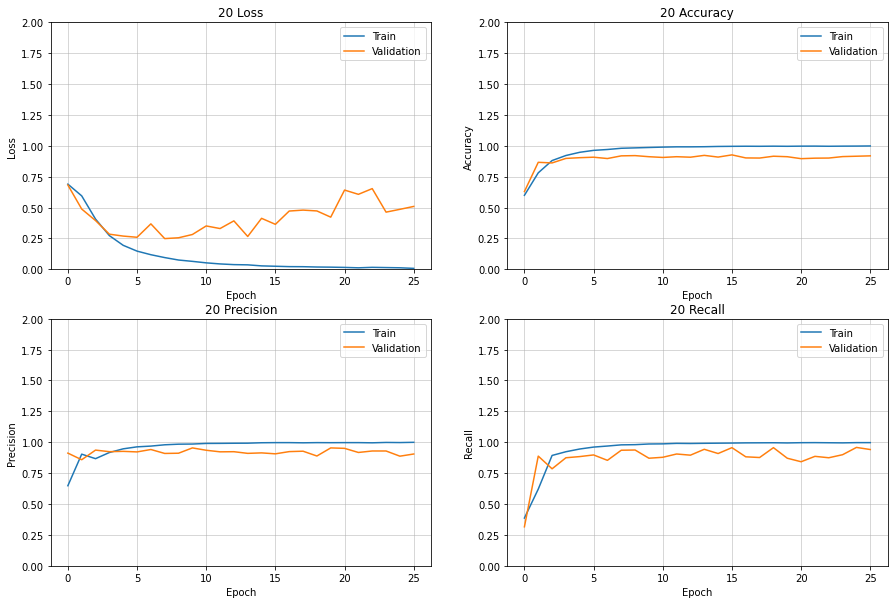

40/40 [==============================] - 0s 8ms/step - loss: 0.2643 - binary_accuracy: 0.9006 - precision: 0.9411 - recall: 0.8600


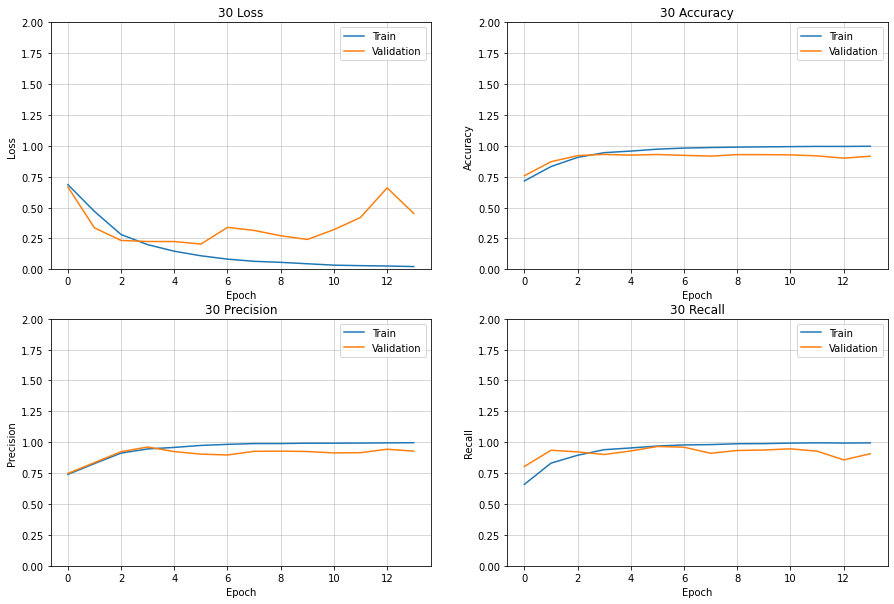

40/40 [==============================] - 0s 9ms/step - loss: 0.5521 - binary_accuracy: 0.9077 - precision: 0.9106 - recall: 0.9092


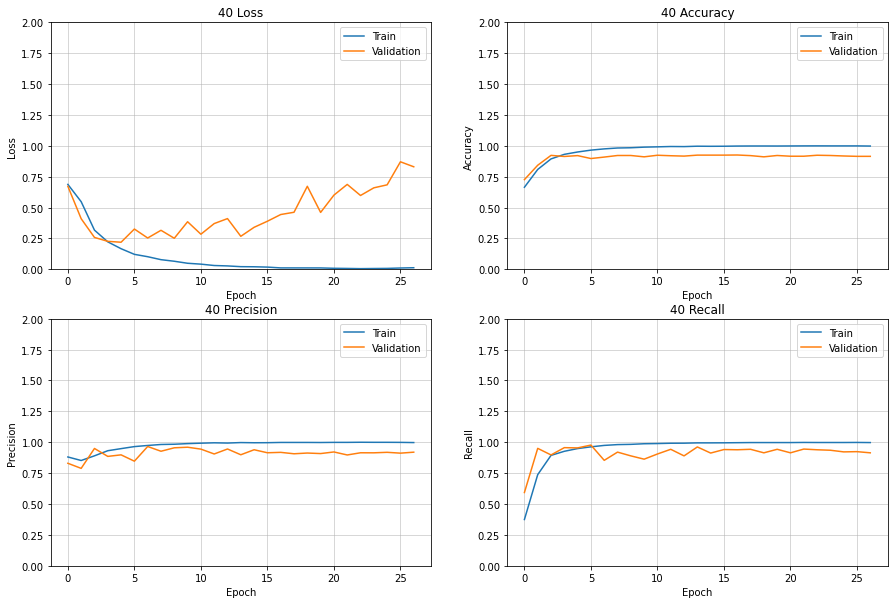

40/40 [==============================] - 0s 12ms/step - loss: 0.2123 - binary_accuracy: 0.9211 - precision: 0.9283 - recall: 0.9169


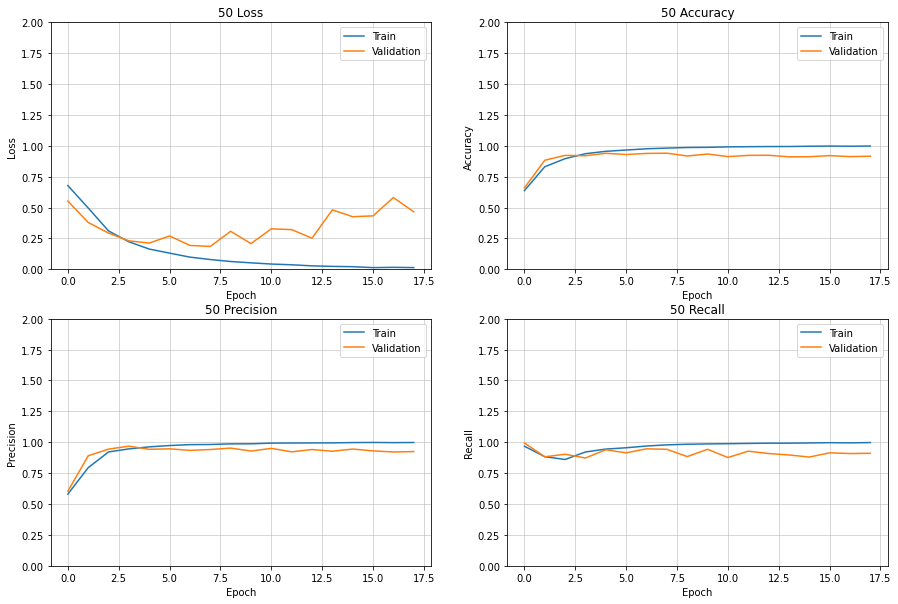

40/40 [==============================] - 0s 12ms/step - loss: 0.2354 - binary_accuracy: 0.9116 - precision: 0.9203 - recall: 0.9062


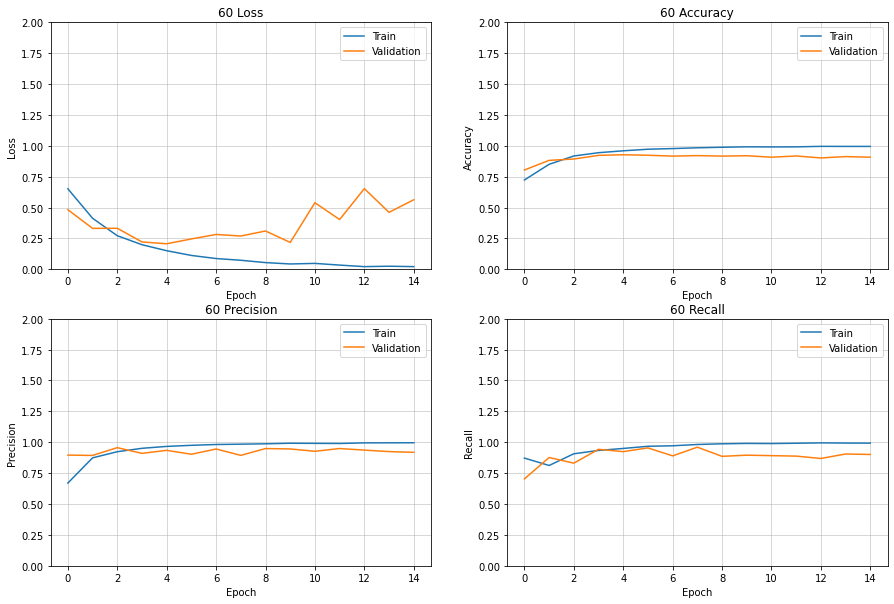

CPU times: user 10min 4s, sys: 38.6 s, total: 10min 43s
Wall time: 9min 32s


In [43]:
%%time
for neurons in qty_neurons:
    model = compile_model(initialize_model('lstm', neurons))
    #model.summary()
    history = model.fit(X_train_token, y_train, 
          epochs=50, 
          batch_size=16,
          validation_split=0.2,
          callbacks=[es],
        verbose = 0, 
        use_multiprocessing=True
          )
    model.evaluate(X_test_token, y_test, verbose=1)
    plot_loss_accuracy(history, f'{neurons} neurons')

## Result:
### Best number of neurons: 100
### Sidenote: takes tooooo long

## GRU model

### Preparing data

In [44]:
    X_train, X_test, y_train, y_test = train_test_split(cleandf['text'], cleandf['target'], test_size=0.3)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(X_train)
    X_train_token = tokenizer.texts_to_sequences(X_train)
    X_test_token = tokenizer.texts_to_sequences(X_test)
    X_train_token = pad_sequences(X_train_token, dtype='int32', padding='post', maxlen=300)
    X_test_token = pad_sequences(X_test_token, dtype='int32', padding='post', maxlen=300)

### Testing model

60/60 [==============================] - 1s 13ms/step - loss: 0.3614 - binary_accuracy: 0.9074 - precision: 0.8918 - recall: 0.9208


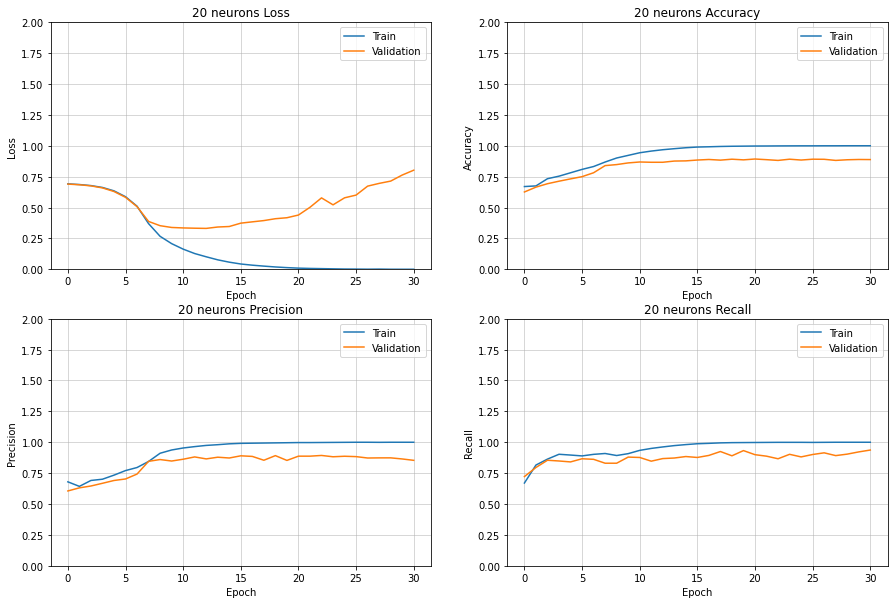

60/60 [==============================] - 1s 10ms/step - loss: 0.4152 - binary_accuracy: 0.8979 - precision: 0.8655 - recall: 0.9349


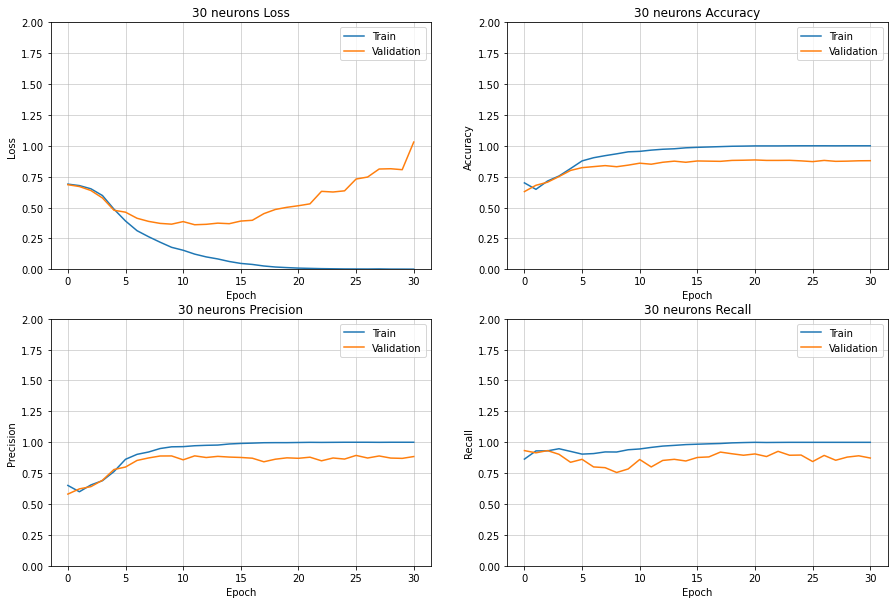

60/60 [==============================] - 1s 10ms/step - loss: 0.2568 - binary_accuracy: 0.9074 - precision: 0.8918 - recall: 0.9208


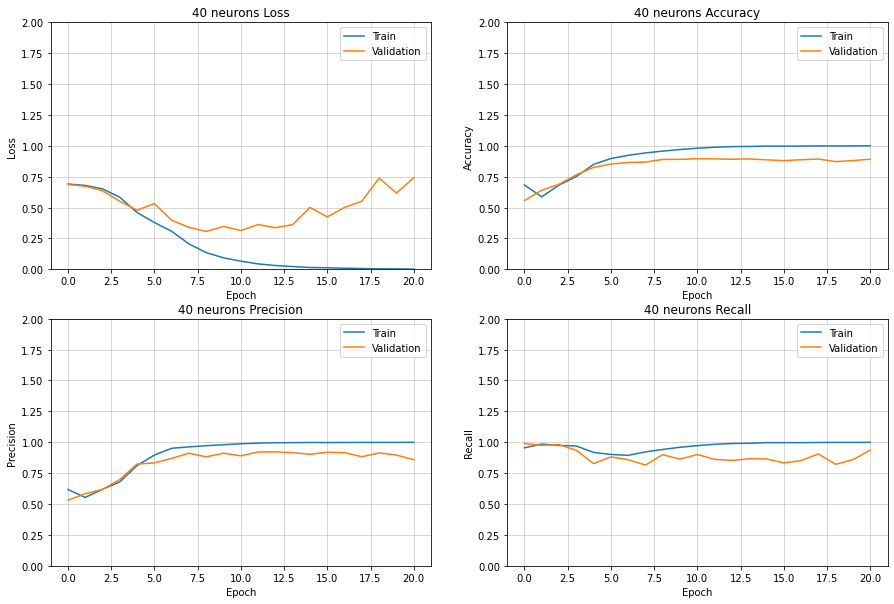

60/60 [==============================] - 1s 8ms/step - loss: 0.2951 - binary_accuracy: 0.9127 - precision: 0.9013 - recall: 0.9208


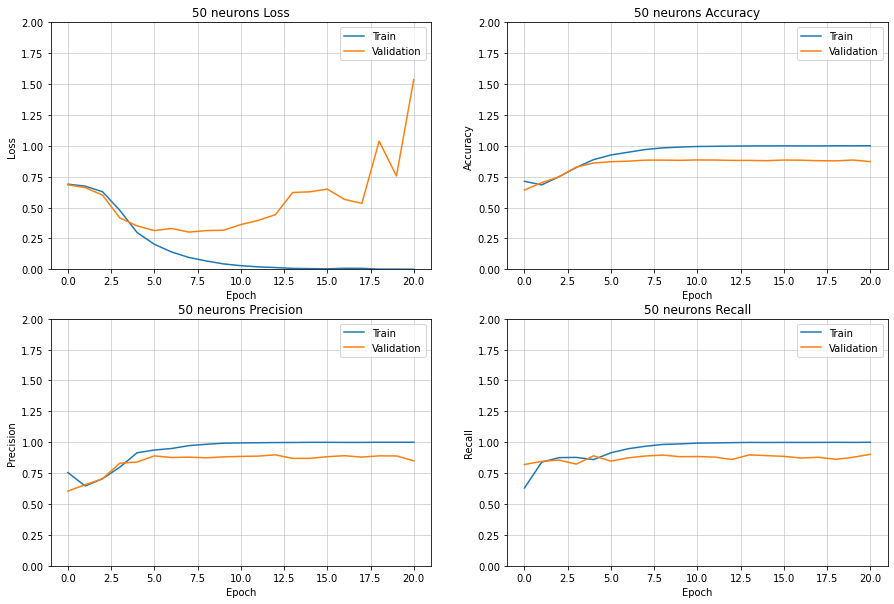

60/60 [==============================] - 1s 12ms/step - loss: 0.4245 - binary_accuracy: 0.9085 - precision: 0.8962 - recall: 0.9176


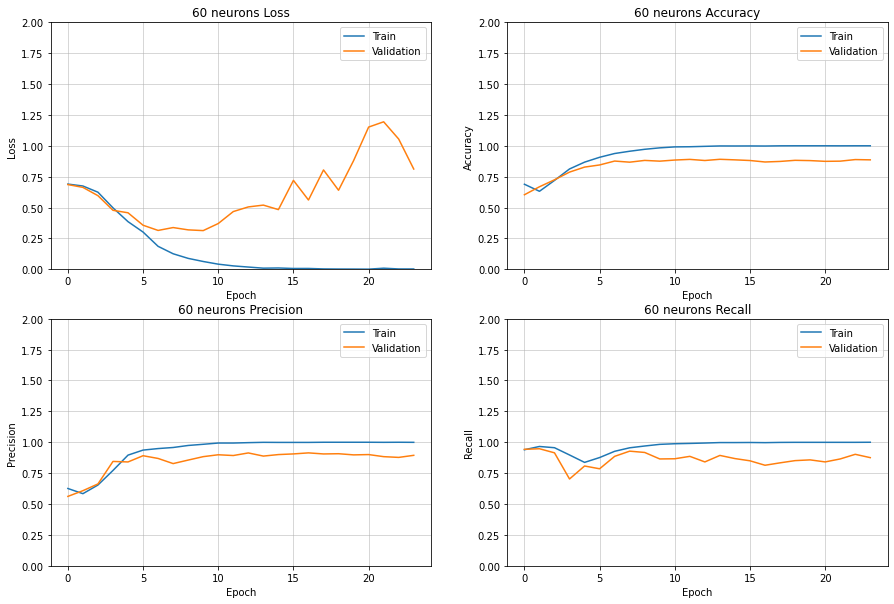

CPU times: user 5min 15s, sys: 20.6 s, total: 5min 36s
Wall time: 5min 30s


In [46]:
%%time
for neurons in qty_neurons:
    model = compile_model(initialize_model('gru', neurons))
    #model.summary()
    history = model.fit(X_train_token, y_train, 
          epochs=50, 
          batch_size=32,
          validation_split=0.3,
          callbacks=[es],
        verbose = 0, 
        use_multiprocessing=True
          )
    model.evaluate(X_test_token, y_test, verbose=1)
    plot_loss_accuracy(history, f'{neurons} neurons')

## Result:
### Best number of neurons: 100